In [92]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [194]:
prj_dir = Path("/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/credici/papers/journalEM/")
res_dir = Path(prj_dir, "./output/synthetic/s123/")
prj_dir_name = str(prj_dir).split("/")[-1]
os.chdir(prj_dir)

In [195]:
files = [Path(res_dir, f) for f in os.listdir(res_dir) if f.endswith(".csv")]
files_ccalp = [f for f in files if any([s in str(f) for s in ["ccalp"]])]
files_ccve = [f for f in files if any([s in str(f) for s in ["ccve"]])]

print(f"read {len(files_ccve)} {len(files_ccalp)}")

read 215 304


In [196]:
df0 = pd.concat([pd.read_csv(f) for f in files_ccve])
df1 = pd.concat([pd.read_csv(f) for f in files_ccalp])

def get_mark(t):
    infofile = "."+t.infoPath.split(prj_dir_name)[-1]
    return pd.read_csv(infofile)["markovianity"]

df0["markovianity"] = df0.apply(get_mark, axis=1)
df1["markovianity"] = df1.apply(get_mark, axis=1)




In [197]:
assert len(df0.modelID.unique()) == len(df0.modelID)
assert len(df1.modelID.unique()) == len(df1.modelID)

In [198]:
df0.columns

Index(['trueState', 'method', 'modelID', 'modelPath', 'cause', 'infoPath',
       'time_pns', 'falseState', 'pns_u', 'effect', 'exact', 'time_learn',
       'pns_l', 'markovianity'],
      dtype='object')

In [199]:
cols = ["modelID", "pns_l", "pns_u"]


In [200]:
df = df0[["modelID", "pns_l", "pns_u", "markovianity"]].merge(df1[["modelID", "pns_l", "pns_u"]], on ="modelID", suffixes=("_ve", "_lp"),)

In [201]:
# keep only qm
df = df[df.markovianity==1]

In [202]:
lb_exact, ub_exact = 0.033535,0.150623
lb_approx, ub_approx = 0.034858, 0.150623

In [203]:
def rrmse(lb_exact, ub_exact, lb_approx, ub_approx):
    a,b, a_,b_ = lb_exact, ub_exact, lb_approx, ub_approx
    #if b_ - a_ == 0 and a==a_ and b==b_: return 0
    if (b_ - a_ == 0) or (b - a == 0): return np.NaN
    #if b_ - a_ == 0 and a==a_ and b==b_: return 0
    return math.sqrt(((a-a_)**2 + (b-b_)**2)/(2*((b_ - a_)**2)))

In [204]:
df["rrmse"] = df.apply(lambda t: rrmse(t["pns_l_ve"],t["pns_u_ve"],t["pns_l_lp"],t["pns_u_lp"]), axis=1)

In [205]:
df["rrmse2"] = df.apply(lambda t: rrmse(t["pns_l_lp"],t["pns_u_lp"],t["pns_l_ve"],t["pns_u_ve"]), axis=1)

In [206]:
df.rrmse.mean()


0.00953451454392692

In [207]:
df["rrmse"].quantile([0.25, .5, .75], interpolation="nearest")

0.25    8.279951e-18
0.50    8.005646e-16
0.75    1.325005e-14
Name: rrmse, dtype: float64

(0.0, 0.01)

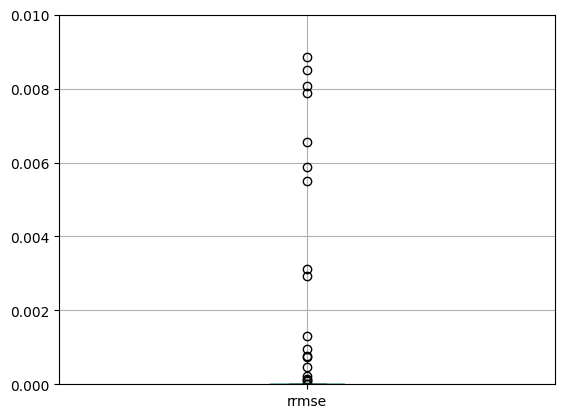

In [208]:
df.boxplot(column="rrmse")
plt.ylim(0,0.01)

<Axes: >

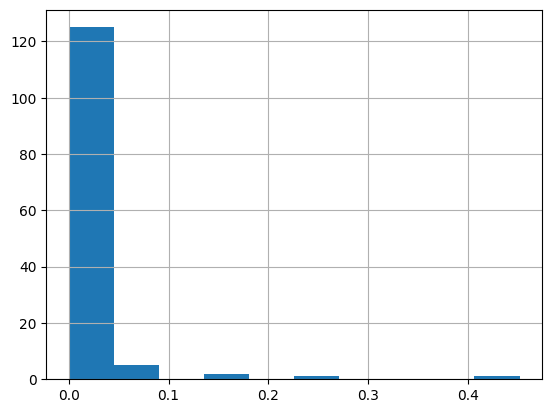

In [193]:
df.rrmse.hist()

In [81]:
df.dropna().sort_values(by="rrmse")

,modelID,pns_l_ve,pns_u_ve,pns_l_lp,pns_u_lp,rrmse,rrmse2
169,random_mc2_n5_mid3_d1000_05_mr098_r10_130_uai,0.000000,0.241100,0.000000,0.241100,0.000000,0.000000
157,random_mc2_n5_mid3_d1000_05_mr098_r10_63_uai,0.000000,0.170228,0.000000,0.170228,0.000000,0.000000
49,random_mc2_n7_mid3_d1000_05_mr098_r10_123_uai,0.010682,0.149952,0.010682,0.149952,0.000000,0.000000
189,random_mc2_n6_mid3_d1000_05_mr098_r10_158_uai,0.000089,0.009533,0.000089,0.009533,0.000000,0.000000
54,random_mc2_n7_mid3_d1000_05_mr098_r10_184_uai,0.003949,0.014433,0.003949,0.014433,0.000000,0.000000
...,...,...,...,...,...,...,...
68,random_mc2_n6_mid3_d1000_05_mr098_r10_144_uai,0.010581,0.036296,0.010581,0.031796,0.149975,0.123732
84,random_mc2_n6_mid3_d1000_05_mr098_r10_42_uai,0.210059,0.483114,0.259709,0.483114,0.157148,0.128574
60,random_mc2_n12_mid3_d1000_05_mr098_r10_154_uai,0.007895,0.250738,0.009718,0.204606,0.167508,0.134430
195,random_mc2_n6_mid3_d1000_05_mr098_r10_18_uai,0.000000,0.042607,0.000000,0.033800,0.184251,0.146165


In [82]:
t = df.loc[df.modelID=="random_mc2_n5_mid3_d1000_05_mr098_r10_167_uai"]
t

,modelID,pns_l_ve,pns_u_ve,pns_l_lp,pns_u_lp,rrmse,rrmse2
29,random_mc2_n5_mid3_d1000_05_mr098_r10_167_uai,0.213234,0.297703,0.232995,0.277394,0.451269,0.237204


In [83]:
idx = [int(f.split("_")[-2])for f in df0.modelID]
min(idx), max(idx)

(1, 200)

In [84]:
idx = [int(f.split("_")[-2]) for f in df1.modelID]
min(idx), max(idx)

(0, 200)

In [85]:
df1.modelID

0     random_mc2_n9_mid3_d1000_05_mr098_r10_10_uai
0     random_mc2_n6_mid3_d1000_05_mr098_r10_91_uai
0    random_mc2_n9_mid3_d1000_05_mr098_r10_192_uai
0    random_mc2_n6_mid3_d1000_05_mr098_r10_146_uai
0    random_mc2_n5_mid3_d1000_05_mr098_r10_147_uai
                         ...                      
0    random_mc2_n6_mid3_d1000_05_mr098_r10_167_uai
0    random_mc2_n9_mid3_d1000_05_mr098_r10_152_uai
0    random_mc2_n5_mid3_d1000_05_mr098_r10_121_uai
0     random_mc2_n7_mid3_d1000_05_mr098_r10_65_uai
0    random_mc2_n8_mid3_d1000_05_mr098_r10_119_uai
Name: modelID, Length: 304, dtype: object

In [86]:
def rrmse(lb_exact, ub_exact, lb_approx, ub_approx):
    a,b, a_,b_ = lb_exact, ub_exact, lb_approx, ub_approx
    #if b_ - a_ == 0 and a==a_ and b==b_: return 0
    if (b_ - a_ == 0) or (b - a == 0): return np.NaN
    #if b_ - a_ == 0 and a==a_ and b==b_: return 0
    return math.sqrt(((a-a_)**2 + (b-b_)**2)/(2*((b_ - a_)**2)))
f = lambda t: rrmse(t["pns_l_ve"],t["pns_u_ve"],t["pns_l_lp"],t["pns_u_lp"])
t["pns_l_ve"],t["pns_u_ve"],t["pns_l_lp"],t["pns_u_lp"]

(29    0.213234
 Name: pns_l_ve, dtype: float64,
 29    0.297703
 Name: pns_u_ve, dtype: float64,
 29    0.232995
 Name: pns_l_lp, dtype: float64,
 29    0.277394
 Name: pns_u_lp, dtype: float64)

In [87]:
df.loc[df.modelID=="random_mc2_n5_mid3_d1000_05_mr098_r10_167_uai"]


,modelID,pns_l_ve,pns_u_ve,pns_l_lp,pns_u_lp,rrmse,rrmse2
29,random_mc2_n5_mid3_d1000_05_mr098_r10_167_uai,0.213234,0.297703,0.232995,0.277394,0.451269,0.237204


In [153]:
df0.infoPath.iloc[0]

'/mnt/beegfs/rcabanas/dev/credici/papers/journalEM/models/synthetic/s1/random_mc2_n5_mid3_d1000_05_mr098_r10_78_info.csv'

In [154]:
t = df0.iloc[0]

'/mnt/beegfs/rcabanas/dev/credici/papers/journalEM/models/synthetic/s1/random_mc2_n5_mid3_d1000_05_mr098_r10_78_info.csv'

In [179]:
df0

,trueState,method,modelID,modelPath,cause,infoPath,time_pns,falseState,pns_u,effect,exact,time_learn,pns_l,markovianity
0,0,CCVE,random_mc2_n5_mid3_d1000_05_mr098_r10_78_uai,/mnt/beegfs/rcabanas/dev/credici/papers/journa...,0,/mnt/beegfs/rcabanas/dev/credici/papers/journa...,82,1,0.163000,2,True,1214,0.163000,1
0,0,CCVE,random_mc2_n5_mid3_d1000_05_mr098_r10_161_uai,/mnt/beegfs/rcabanas/dev/credici/papers/journa...,1,/mnt/beegfs/rcabanas/dev/credici/papers/journa...,235,1,0.000000,0,True,1176,0.000000,1
0,0,CCVE,random_mc2_n6_mid3_d1000_05_mr098_r10_94_uai,/mnt/beegfs/rcabanas/dev/credici/papers/journa...,0,/mnt/beegfs/rcabanas/dev/credici/papers/journa...,23899659,1,0.150623,5,True,4471,0.033535,1
0,0,CCVE,random_mc2_n5_mid3_d1000_05_mr098_r10_80_uai,/mnt/beegfs/rcabanas/dev/credici/papers/journa...,1,/mnt/beegfs/rcabanas/dev/credici/papers/journa...,3148,1,0.970787,4,True,1562,0.950555,0
0,0,CCVE,random_mc2_n6_mid3_d1000_05_mr098_r10_148_uai,/mnt/beegfs/rcabanas/dev/credici/papers/journa...,0,/mnt/beegfs/rcabanas/dev/credici/papers/journa...,788,1,0.027986,5,True,1106,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,CCVE,random_mc2_n6_mid3_d1000_05_mr098_r10_184_uai,/mnt/beegfs/rcabanas/dev/credici/papers/journa...,5,/mnt/beegfs/rcabanas/dev/credici/papers/journa...,114,1,0.000871,4,True,1458,0.000000,1
0,0,CCVE,random_mc2_n5_mid3_d1000_05_mr098_r10_19_uai,/mnt/beegfs/rcabanas/dev/credici/papers/journa...,0,/mnt/beegfs/rcabanas/dev/credici/papers/journa...,133,1,0.537350,4,True,2004,0.239910,0
0,0,CCVE,random_mc2_n6_mid3_d1000_05_mr098_r10_58_uai,/mnt/beegfs/rcabanas/dev/credici/papers/journa...,3,/mnt/beegfs/rcabanas/dev/credici/papers/journa...,226,1,0.000000,2,True,1375,0.000000,1
0,0,CCVE,random_mc2_n6_mid3_d1000_05_mr098_r10_169_uai,/mnt/beegfs/rcabanas/dev/credici/papers/journa...,2,/mnt/beegfs/rcabanas/dev/credici/papers/journa...,897,1,0.039992,3,True,1404,0.000000,1
